<a href="https://colab.research.google.com/github/andrewkoji/pandas/blob/master/ML_Rock_paper_Scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

In [ ]:
pip install tensorflow-datasets

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

In [ ]:
## Find DataSets

In [ ]:
tfds.list_builders()

In [ ]:
## Get Info On Data

In [ ]:
builder = tfds.builder('rock_paper_scissors')
info = builder.info
info

In [ ]:
## Prepping RPS

In [ ]:
ds_train = tfds.load(name='rock_paper_scissors', split='train')
ds_test = tfds.load(name='rock_paper_scissors', split='test')

In [ ]:
## Show Examples

In [ ]:
fig = tfds.show_examples(info, ds_train)

In [ ]:
## Additional Data Prep

In [ ]:
train_images = np.array([example['image'].numpy()[:,:,0] for example in ds_train])
train_labels = np.array([example['label'].numpy() for example in ds_train])

test_images = np.array([example['image'].numpy()[:,:,0] for example in ds_test])
test_labels = np.array([example['label'].numpy() for example in ds_test])

In [ ]:
type(train_images[0])
train_images.shape
test_images.shape

(372, 300, 300)

In [ ]:
train_images = train_images.reshape(2520, 300, 300, 1)
test_images = test_images.reshape(372, 300, 300, 1)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images /= 255
test_images /= 255

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 4s 16ms/step - loss: 35.8464 - accuracy: 0.4167
Epoch 2/5
79/79 [==============================] - 1s 16ms/step - loss: 1.6608 - accuracy: 0.6544
Epoch 3/5
79/79 [==============================] - 1s 16ms/step - loss: 0.8110 - accuracy: 0.7599
Epoch 4/5
79/79 [==============================] - 1s 16ms/step - loss: 0.3859 - accuracy: 0.8659
Epoch 5/5
79/79 [==============================] - 1s 16ms/step - loss: 0.4214 - accuracy: 0.8456


In [ ]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 8ms/step - loss: 2.0706 - accuracy: 0.4489


[2.0706300735473633, 0.448924720287323]

In [ ]:
## Convolutional Neural Network 

In [ ]:
model = keras.Sequential([
    keras.layers.AveragePooling2D(6, 3, input_shape=(300,300,1)),
    keras.layers.Conv2D(64, 3, activation='relu'),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5, batch_size=32)

Epoch 1/5
79/79 [==============================] - 12s 33ms/step - loss: 0.8082 - accuracy: 0.6929
Epoch 2/5
79/79 [==============================] - 2s 28ms/step - loss: 0.1045 - accuracy: 0.9798
Epoch 3/5
79/79 [==============================] - 2s 28ms/step - loss: 0.0156 - accuracy: 0.9984
Epoch 4/5
79/79 [==============================] - 2s 28ms/step - loss: 0.0075 - accuracy: 0.9992
Epoch 5/5
79/79 [==============================] - 2s 28ms/step - loss: 0.0051 - accuracy: 0.9992


In [ ]:
model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 26ms/step - loss: 0.9681 - accuracy: 0.7177


[0.9681044816970825, 0.7177419066429138]

In [ ]:
## Keras Tuner

In [ ]:
pip install keras-tuner --upgrade

In [ ]:
from kerastuner.tuners import RandomSearch


def build_model(hp):
  model = keras.Sequential()
  
  model.add(keras.layers.AveragePooling2D(6,3,input_shape=(300,300,1)))
  
  for i in range(hp.Int("Conv Layers", min_value=0, max_value=3)):
    model.add(keras.layers.Conv2D(hp.Choice('layer_{i}_filters', [16,32,64]), 3, activation='relu'))
  
  model.add(keras.layers.Conv2D(64, 3, activation='relu'))
  model.add(keras.layers.Conv2D(32, 3, activation='relu'))

  model.add(keras.layers.MaxPool2D(2,2))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Flatten())

  model.add(keras.layers.Dense(hp.Choice('Dense layer', [64, 128, 256, 512, 1024]), activation='relu'))

  model.add(keras.layers.Dense(3, activation='softmax'))

  model.compile(optimizer='adam',
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])
  return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=32,
    # directory='new_directory'
)

tuner.search(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10, batch_size=32)

Trial 3 Complete [00h 00m 26s]
val_accuracy: 0.725806474685669

Best val_accuracy So Far: 0.7822580933570862
Total elapsed time: 00h 02m 24s
INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [ ]:
best_model = tuner.get_best_models()[0]

In [ ]:
best_model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 17ms/step - loss: 0.6086 - accuracy: 0.7823


[0.6086232662200928, 0.7822580933570862]

In [ ]:
## Save and Load models

In [ ]:
best_model.save('./C:/Users/alevi/OneDrive/Desktop/Bootcamp_syllabi/Machine_learning')

INFO:tensorflow:Assets written to: ./C:/Users/alevi/OneDrive/Desktop/Bootcamp_syllabi/Machine_learning/assets


INFO:tensorflow:Assets written to: ./C:/Users/alevi/OneDrive/Desktop/Bootcamp_syllabi/Machine_learning/assets


In [ ]:
loaded_model = keras.models.load_model('./C:/Users/alevi/OneDrive/Desktop/Bootcamp_syllabi/Machine_learning')

In [ ]:
loaded_model.evaluate(test_images, test_labels)

12/12 [==============================] - 0s 17ms/step - loss: 0.6086 - accuracy: 0.7823


[0.6086232662200928, 0.7822580933570862]

In [ ]:
## Plot Image from numpy array/

(300, 300, 3)

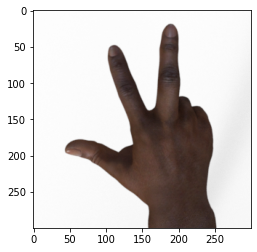

In [ ]:
rgb_images = np.array([example['image'].numpy() for example in ds_train.take(1)])
rgb_image = rgb_images[0]
image = train_images[0].reshape(300,300)

plt.imshow(rgb_image)
rgb_image.shape

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
## Convert PNG/JPG images to numpy format

<class 'imageio.core.util.Array'>
(2691, 5017, 3)


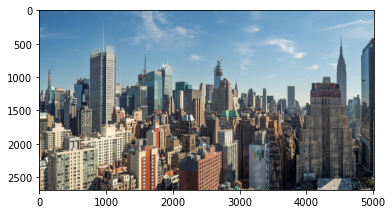

In [ ]:
import imageio

im = imageio.imread('https://upload.wikimedia.org/wikipedia/commons/a/a5/West_side_of_Manhattan_from_Hudson_Commons_%2895103p%29.jpg')

plt.imshow(im)

print(type(im))

im_np = np.asarray(im)

print(im_np.shape)